# Perceptron plotting function

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def plot_perceptron_regression(samples, labels, weights, x_range):
    # Plot style
    plt.axis('equal')
    plt.axhline(0, color='black', linewidth=.5)
    plt.axvline(0, color='black', linewidth=.5)
    plt.xlabel('x1')
    plt.ylabel('x2')
    ax = plt.gca()
    ax.set_xlim([x_range[0], x_range[1]])
    ax.set_ylim([x_range[0], x_range[1]])

    # Linear axis computation
    x1 = np.linspace(x_range[0], x_range[1], 100)
    x2 = - (weights[0] + weights[1] * x1) / weights[2]

    # Input data plot
    plt.plot(x1, x2)
    for i, sample in enumerate(samples):
        plt.plot(sample[0], sample[1], "bo" if labels[i] == 1 else "ro")

    plt.show()


def display_mse(perceptron, y_lim):
    mse = perceptron.mse
    print(f"Minimum atteint: {min(mse)}")
    len(mse)

    plt.figure(figsize=(5, 5))
    plt.plot(range(len(mse)), mse)
    plt.ylim(0, y_lim)
    plt.grid()

    plt.xlabel("Number of Epochs")
    plt.ylabel("Mean Square Error")

# Gradient Perceptron learning AND gate

[-1.3034236858365589, 0.8342723419489788, 0.8342723419489788]


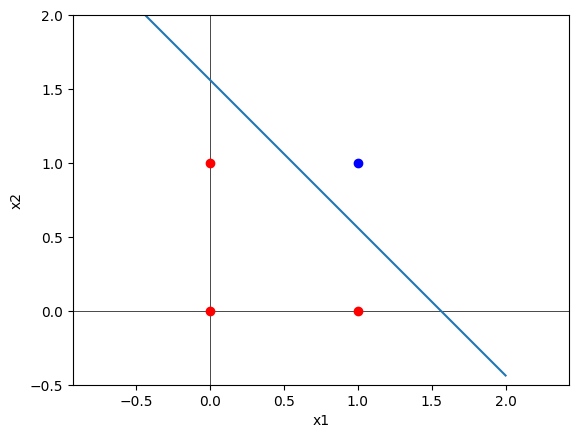

In [2]:
import quark

samples = [[0, 0], [0, 1], [1, 0], [1, 1]]
labels = [-1, -1, -1, 1]

perceptron = quark.GradientPerceptron(2, 0.03, False, "Step")
perceptron.train(samples, labels, 100)

print(perceptron.weights)

plot_perceptron_regression(samples, labels, perceptron.weights, [-0.5, 2])

Minimum atteint: 0.13262677752831373


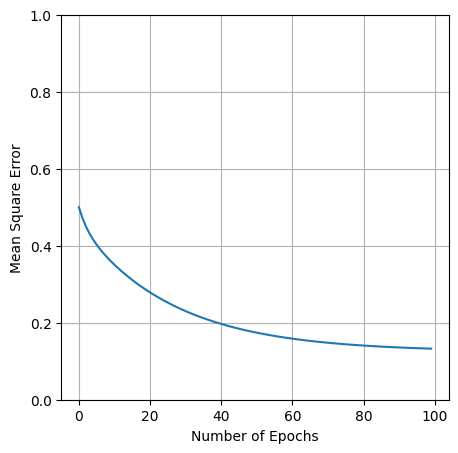

In [3]:
display_mse(perceptron, 1.0)

# Gradient Perceptron learning OR gate

[-0.36512099806139864, 0.8862875148620694, 0.8862875148620694]


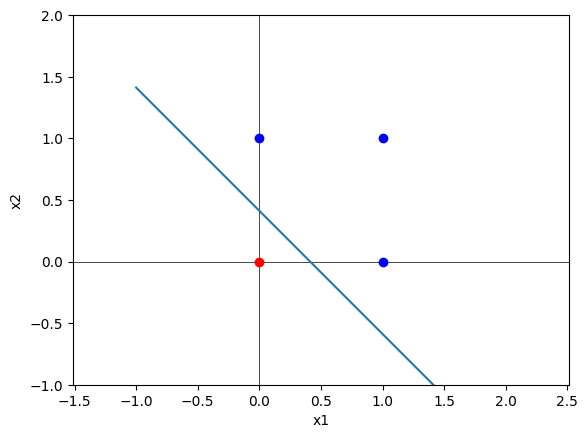

In [4]:
samples = [[0, 0], [0, 1], [1, 0], [1, 1]]
labels = [-1, 1, 1, 1]

perceptron = quark.GradientPerceptron(2, 0.03, False, "Step")
perceptron.train(samples, labels, 100)

print(perceptron.weights)

plot_perceptron_regression(samples, labels, perceptron.weights, [-1, 2])

Minimum atteint: 0.12859060302334605


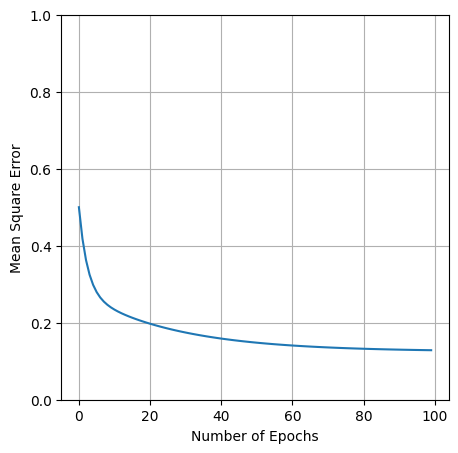

In [5]:
display_mse(perceptron, 1.0)

# Gradient Perceptron learning XOR gate

[0.04832740870739423, -0.048617319439389545, -0.03286948964590856]


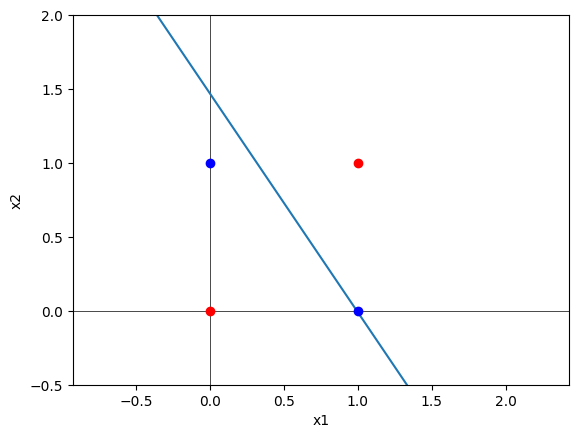

In [6]:
samples = [[0, 0], [0, 1], [1, 0], [1, 1]]
labels = [-1, 1, 1, -1]

perceptron = quark.GradientPerceptron(2, 0.03, True, "Step")
perceptron.train(samples, labels, 100)

print(perceptron.weights)

plot_perceptron_regression(samples, labels, perceptron.weights, [-0.5, 2])

Minimum atteint: 0.5004774358342755


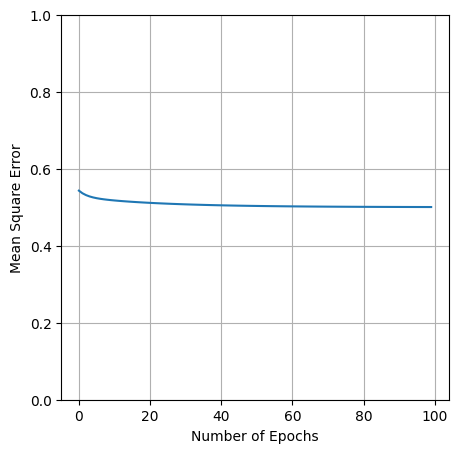

In [7]:
display_mse(perceptron, 1.0)

# Gradient Perceptron learning sample 2.9

[-1.8200987003677007, -0.5268649372297891, 0.48323342727906204]


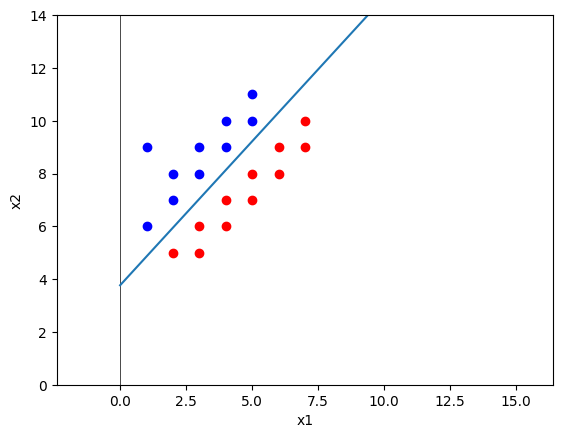

In [8]:
import quark
import pandas as pd

df = pd.read_csv("datasets/table_2_9.csv", header=None)
samples = df.iloc[:, :2].values.tolist()
labels = df.iloc[:, 2].values.tolist()
labelsFormatted = list()
for i in labels:
    if(i == 0):
        labelsFormatted.append(-1)
    else:
        labelsFormatted.append(1)

perceptron = quark.GradientPerceptron(2, 0.0011, False, "Step")
perceptron.train(samples, labelsFormatted, 2000)

print(perceptron.weights)

plot_perceptron_regression(samples, labelsFormatted, perceptron.weights, [0, 14])

In [ ]:
display_mse(perceptron, 1.0)

# Gradient Perceptron learning sample 2.10

In [ ]:
import quark
import pandas as pd

df = pd.read_csv("datasets/table_2_10.csv", header=None)
samples = df.iloc[:, :2].values.tolist()
labels = df.iloc[:, 2].values.tolist()
labelsFormatted = list()
for i in labels:
    if(i == 0):
        labelsFormatted.append(-1)
    else:
        labelsFormatted.append(1)
        
perceptron = quark.GradientPerceptron(2, 0.0015, False, "Step")
perceptron.train(samples, labelsFormatted, 100)

print(perceptron.weights)

plot_perceptron_regression(samples, labels, perceptron.weights, [0, 8])

In [ ]:
display_mse(perceptron, 1.0)

# Gradient Perceptron learning table 2.11

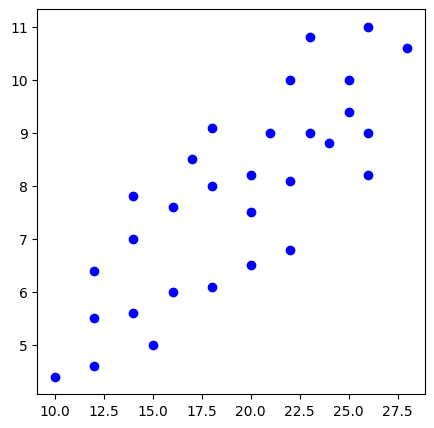

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv("datasets/table_2_11.csv")

samples = df[["x1"]].values.tolist()
labels = df["d"].values.tolist()

plt.figure(figsize=(5,5))
plt.scatter(samples, labels, marker='o', color='b')

In [10]:
perceptron = quark.GradientPerceptron(1, 0.0001, False, "Linear")
perceptron.train(samples, labels, 2000)

Minimum atteint: 0.6358717212168685


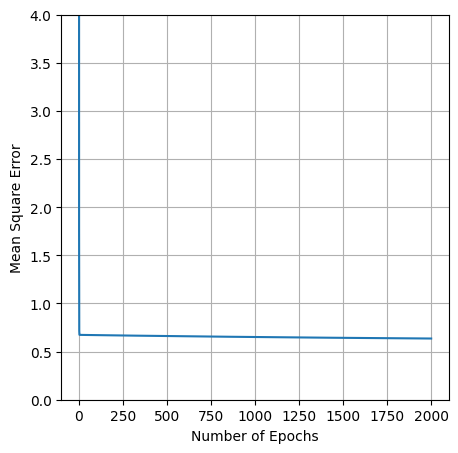

In [11]:
display_mse(perceptron, 4.0)

Text(0, 0.5, 'x2')

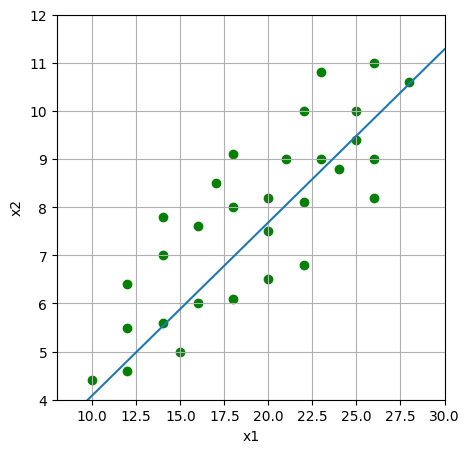

In [12]:
import matplotlib.pyplot as plt
import numpy as np

xlim = [8, 30]
ylim = [4, 12]
step = 0.1

plt.figure(figsize=(5, 5))

f2 = np.vectorize(perceptron.predict)

X = np.linspace(xlim[0], xlim[1], 100)
Y = []
for x in X:
    Y.append(perceptron.predict([x]))

plt.plot(X, Y)

for sample in df.values:
    plt.scatter(sample[0], sample[1], marker='o', color='g')

plt.xlim(xlim[0], xlim[1])
plt.ylim(ylim[0], ylim[1])
plt.grid()

plt.xlabel("x1")
plt.ylabel("x2")